**Welcome To My Capstone Project:** _Identifying the Best City for a Doctor to Set Up a Medical Practice_

In [2]:
import requests
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from sklearn.cluster import KMeans
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


**Now I Will Try to Develop A List of Cities With the Highest Level of Heart Disease Issues**

In [3]:
#Note: I was able to download this database from the CDC's 500 Cities project ==> https://nccd.cdc.gov/500_Cities
HD_DB = pd.read_csv('Heart Disease Database By City.csv')
HD_DB.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,IL,Illinois,Naperville,Census Tract,BRFSS,Health Outcomes,1751622-17197880303,Coronary heart disease among adults aged >=18 ...,%,...,4.0,NaN,NaN,3107,"(41.716520664, -88.1756019879)",HLTHOUT,CHD,1751622.0,1.719788e+10,Coronary Heart Disease
1,2017,IL,Illinois,Joliet,Census Tract,BRFSS,Health Outcomes,1738570-17197882500,Coronary heart disease among adults aged >=18 ...,%,...,5.9,NaN,NaN,2370,"(41.5154935931, -88.0809887327)",HLTHOUT,CHD,1738570.0,1.719788e+10,Coronary Heart Disease
2,2017,IL,Illinois,Naperville,Census Tract,BRFSS,Health Outcomes,1751622-17043846103,Coronary heart disease among adults aged >=18 ...,%,...,3.8,NaN,NaN,2941,"(41.7766920763, -88.1388979624)",HLTHOUT,CHD,1751622.0,1.704385e+10,Coronary Heart Disease
3,2017,IL,Illinois,Peoria,Census Tract,BRFSS,Health Outcomes,1759000-17143000300,Coronary heart disease among adults aged >=18 ...,%,...,8.8,NaN,NaN,2332,"(40.6722637312, -89.6280059311)",HLTHOUT,CHD,1759000.0,1.714300e+10,Coronary Heart Disease
4,2017,IL,Illinois,Cicero,Census Tract,BRFSS,Health Outcomes,1714351-17031814500,Coronary heart disease among adults aged >=18 ...,%,...,5.8,NaN,NaN,4978,"(41.8302018874, -87.7745429812)",HLTHOUT,CHD,1714351.0,1.703181e+10,Coronary Heart Disease


In [4]:
HD_DB['Data_Value'].describe()

count    28212.000000
mean         5.601081
std          2.092404
min          0.300000
25%          4.200000
50%          5.300000
75%          6.700000
max         35.800000
Name: Data_Value, dtype: float64

In [5]:
#Note that the Database is Segmented by Tracking Zone, Not City.  I Need to Group the Information By City.
GB1=HD_DB.groupby(['CityName','StateAbbr','StateDesc']).mean()
GB1.head()

Year  Data_Value  Low_Confidence_Limit  \
CityName StateAbbr StateDesc                                              
Abilene  TX        Texas       2017.0    6.289744              5.779487   
Akron    OH        Ohio        2017.0    7.883824              7.297059   
Alameda  CA        California  2017.0    4.355556              4.000000   
Albany   GA        Georgia     2017.0    7.081481              6.488889   
         NY        New York    2017.0    5.442857              5.014286   

                               High_Confidence_Limit  PopulationCount  \
CityName StateAbbr StateDesc                                            
Abilene  TX        Texas                    6.810256      8779.725000   
Akron    OH        Ohio                     8.497059      8533.285714   
Alameda  CA        California               4.761111     12302.000000   
Albany   GA        Georgia                  7.718519      8603.777778   
         NY        New York                 5.942857     10484.571429   

                                CityFIPS     TractFIPS  
CityName StateAbbr StateDesc                            
Abilene  TX        Texas       4801000.0  4.842617e+10  
Akron    OH        Ohio        3901000.0  3.915351e+10  
Alameda  CA        California   600562.0  6.001428e+09  
Albany   GA        Georgia     1301052.0  1.309501e+10  
         NY        New York    3601000.0  3.600100e+10

In [6]:
# Limit The Data to Just What I Need
GB1.reset_index(inplace=True)
DB4=GB1[['CityName','StateAbbr','StateDesc','Data_Value']]
DB4

,CityName,StateAbbr,StateDesc,Data_Value
0,Abilene,TX,Texas,6.289744
1,Akron,OH,Ohio,7.883824
2,Alameda,CA,California,4.355556
3,Albany,GA,Georgia,7.081481
4,Albany,NY,New York,5.442857
...,...,...,...,...
495,Wyoming,MI,Michigan,5.787500
496,Yakima,WA,Washington,7.476190
497,Yonkers,NY,New York,6.077358
498,Youngstown,OH,Ohio,10.272727


In [7]:
# I Would Like to Perform Some Data Analysis So I Want to Look at the Data
DB4['Data_Value'].describe()

count    500.000000
mean       5.535936
std        1.277269
min        2.975000
25%        4.560425
50%        5.411263
75%        6.365949
max       10.272727
Name: Data_Value, dtype: float64

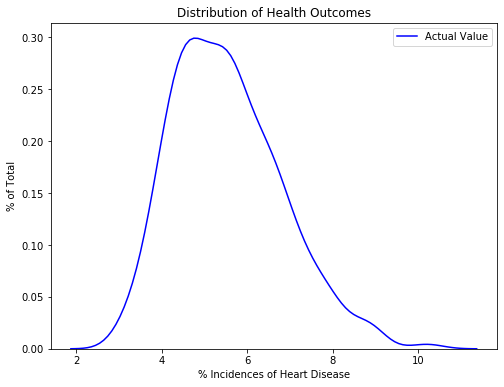

In [8]:
#Plot the Data Using Seaborn (SNS) to Get a Visual Representation
width = 8
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.distplot(DB4['Data_Value'], hist=False, color="b", label="Actual Value")

plt.title('Distribution of Health Outcomes')
plt.xlabel('% Incidences of Heart Disease')
plt.ylabel('% of Total')

plt.show()
plt.close()

In [9]:
#I Need to Make A New Column That Combines City and State.  This Will Allow Me to Merge It With Other Dataframes Later On:
DB4.rename(columns={'Data_Value':'Ave. Rate'},inplace=True)
DB4['Address']= (DB4['CityName'] + ", " + DB4['StateDesc'])
DB4.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CityName,StateAbbr,StateDesc,Ave. Rate,Address
0,Abilene,TX,Texas,6.289744,"Abilene, Texas"
1,Akron,OH,Ohio,7.883824,"Akron, Ohio"
2,Alameda,CA,California,4.355556,"Alameda, California"
3,Albany,GA,Georgia,7.081481,"Albany, Georgia"
4,Albany,NY,New York,5.442857,"Albany, New York"


In [10]:
#Cleanup the DataFrame a Bit
RankingDB=DB4[['Address','Ave. Rate']]
RankingDB = RankingDB.round({'Ave. Rate': 2})
RankingDB.head()

,Address,Ave. Rate
0,"Abilene, Texas",6.29
1,"Akron, Ohio",7.88
2,"Alameda, California",4.36
3,"Albany, Georgia",7.08
4,"Albany, New York",5.44


**Now I Will Create A GeoLocation Database**  

In [11]:
# Download Top 1000 Zip Codes DataFrame and Take a Look Source: https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/table/?sort=-rank
df = pd.read_csv('1000 Zip Codes.csv')
df.head()

,City,Rank,State,Growth From 2000 to 2013,Population,Coordinates
0,Marysville,552,Washington,115.7,63269,"48.0517637, -122.1770818"
1,Perris,466,California,98.7,72326,"33.7825194, -117.2286478"
2,Cleveland,48,Ohio,-18.1,390113,"41.49932, -81.6943605"
3,Worcester,129,Massachusetts,5.8,182544,"42.2625932, -71.8022934"
4,Columbia,192,South Carolina,11.7,133358,"34.0007104, -81.0348144"


The following steps are intended to cleanup the dataframe.  
First I will separate the 'Coordinates' column into latitude and longitude.  
Then, I will create an 'Address' column.   This will allow me to merge this dataframe with the new revised heart disease dataframe.

In [12]:
df2 =df.join(
...     df['Coordinates'].str.split(',', expand=True).rename(
...         columns={0:'Latitude', 1:'Longitude'}))
df2['Address']= (df2['City'] + ", " + df2['State'])
df2

,City,Rank,State,Growth From 2000 to 2013,Population,Coordinates,Latitude,Longitude,Address
0,Marysville,552,Washington,115.7,63269,"48.0517637, -122.1770818",48.0517637,-122.1770818,"Marysville, Washington"
1,Perris,466,California,98.7,72326,"33.7825194, -117.2286478",33.7825194,-117.2286478,"Perris, California"
2,Cleveland,48,Ohio,-18.1,390113,"41.49932, -81.6943605",41.49932,-81.6943605,"Cleveland, Ohio"
3,Worcester,129,Massachusetts,5.8,182544,"42.2625932, -71.8022934",42.2625932,-71.8022934,"Worcester, Massachusetts"
4,Columbia,192,South Carolina,11.7,133358,"34.0007104, -81.0348144",34.0007104,-81.0348144,"Columbia, South Carolina"
...,...,...,...,...,...,...,...,...,...
995,Santa Barbara,339,California,0.9,90412,"34.4208305, -119.6981901",34.4208305,-119.6981901,"Santa Barbara, California"
996,Addison,986,Illinois,2.6,37385,"41.931696, -87.9889556",41.931696,-87.9889556,"Addison, Illinois"
997,Rio Rancho,329,New Mexico,74.4,91956,"35.2327544, -106.6630437",35.2327544,-106.6630437,"Rio Rancho, New Mexico"
998,Normal,671,Illinois,19.7,54664,"40.5142026, -88.9906312",40.5142026,-88.9906312,"Normal, Illinois"


In [13]:
#Create a DataFrame and Make Sure Data is in the Correct Format
LLDB=df2[['Address','Latitude','Longitude']]
LLDB['Latitude']=LLDB['Latitude'].astype(float)
LLDB['Longitude']=LLDB['Longitude'].astype(float)
LLDB.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Address       object
Latitude     float64
Longitude    float64
dtype: object

**Now I Will Merge the Databases**  
I will also check to make sure the columns are of the appropriate data types so that FourSquare API can read correctly.


In [14]:
city_db = pd.merge(RankingDB,LLDB,on='Address')
city_db.dtypes

Address       object
Ave. Rate    float64
Latitude     float64
Longitude    float64
dtype: object

**Now I Will Identify the Top 25 Cities to Further Explore**

In [15]:
#Sort the Database By Ave. Disease Rate
city_db_sorted=city_db.sort_values('Ave. Rate',ascending=False)
city_db_sorted.rename(columns={'Address':'City'},inplace=True)
city_db_sorted.head()

,City,Ave. Rate,Latitude,Longitude
475,"Youngstown, Ohio",10.27,41.099780,-80.649519
153,"Gary, Indiana",10.15,41.593370,-87.346427
211,"Largo, Florida",9.02,27.909467,-82.787324
114,"Detroit, Michigan",9.00,42.331427,-83.045754
86,"Cleveland, Ohio",8.94,41.499320,-81.694361


In [16]:
# Create a new dataframe of the top 25 cities
limit = 25
map_db = city_db_sorted.iloc[0:limit, :]
map_db.reset_index(inplace=True)
map_db.head(limit)

,index,City,Ave. Rate,Latitude,Longitude
0,475,"Youngstown, Ohio",10.27,41.099780,-80.649519
1,153,"Gary, Indiana",10.15,41.593370,-87.346427
2,211,"Largo, Florida",9.02,27.909467,-82.787324
3,114,"Detroit, Michigan",9.00,42.331427,-83.045754
4,86,"Cleveland, Ohio",8.94,41.499320,-81.694361
5,49,"Boynton Beach, Florida",8.93,26.531787,-80.090547
6,171,"Hialeah, Florida",8.89,25.857596,-80.278106
7,308,"Palm Coast, Florida",8.88,29.584452,-81.207870
8,138,"Flint, Michigan",8.75,43.012527,-83.687456
9,106,"Dayton, Ohio",8.73,39.758948,-84.191607


In [17]:
#Cleanup Step ==> Drop the Index Column
map_db.drop('index', axis=1, inplace=True)
map_db.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,Ave. Rate,Latitude,Longitude
0,"Youngstown, Ohio",10.27,41.099780,-80.649519
1,"Gary, Indiana",10.15,41.593370,-87.346427
2,"Largo, Florida",9.02,27.909467,-82.787324
3,"Detroit, Michigan",9.00,42.331427,-83.045754
4,"Cleveland, Ohio",8.94,41.499320,-81.694361


**I Will Now Explore These Cities Using FourSquare**

In [37]:
#First, Establish FourSquare Credentials
CLIENT_ID = 'GM2U2SKB1BWRC1GR2Z5F5VWN4J0NIFGM2D53BAPWYZ4IGNRF' # My Foursquare ID
CLIENT_SECRET = 'ERVJ52PPNXCWG10OFLNEC14HVWYDV3A03X2ILUCK4NYSLK10' # My Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GM2U2SKB1BWRC1GR2Z5F5VWN4J0NIFGM2D53BAPWYZ4IGNRF
CLIENT_SECRET:ERVJ52PPNXCWG10OFLNEC14HVWYDV3A03X2ILUCK4NYSLK10


In [38]:
#Now I will test my  query can read my cities dataframe and extract the appropriate information
city_latitude = map_db.loc[1, 'Latitude'] # city latitude value
city_longitude = map_db.loc[1, 'Longitude'] # city longitude value

city_name = map_db.loc[1, 'City'] # city name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Gary, Indiana are 41.5933696, -87.3464271.


In [39]:
#Write my FourSquare Query on the Test Case
LIMIT = 100
Radius = 16000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    Radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=GM2U2SKB1BWRC1GR2Z5F5VWN4J0NIFGM2D53BAPWYZ4IGNRF&client_secret=ERVJ52PPNXCWG10OFLNEC14HVWYDV3A03X2ILUCK4NYSLK10&v=20180604&ll=41.5933696,-87.3464271&radius=16000&limit=100'

In [40]:
#Query FourSquare and Get Results
results = requests.get(url).json()

In [41]:
# Write a Function that extracts venue categories information from the FourSquare data
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
#Create a Readable DataFrame of the Results
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,US Steel Yard,Baseball Stadium,41.602861,-87.332753
1,Great Lakes Cafe,Café,41.606097,-87.320134
2,Popeyes Louisiana Kitchen,Fried Chicken Joint,41.592090,-87.337534
3,Big Daddy's BBQ,BBQ Joint,41.542653,-87.359267
4,18th Street Brewery,Brewery,41.599076,-87.267176


In [43]:
#Write a function that queries FourSquare and Extracts Venue Information from the results for ALL the cities in my dataframe.
def getNearbyVenues(city, latitudes, longitudes, radius=16000, LIMIT=100):
    
    venues_list=[]
    for city, lat, lng in zip( city, latitudes, longitudes):
        print(city)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            city, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
#Execute the Function ==> Note that a list of the cities and URL will be printed per the ~4th row of the function
city_venues = getNearbyVenues(city=map_db['City'],
                                   latitudes=map_db['Latitude'],
                                   longitudes=map_db['Longitude']
                                  )

Youngstown, Ohio
Gary, Indiana
Largo, Florida
Detroit, Michigan
Cleveland, Ohio
Boynton Beach, Florida
Hialeah, Florida
Palm Coast, Florida
Flint, Michigan
Dayton, Ohio
Hemet, California
Canton, Ohio
Charleston, West Virginia
Pompano Beach, Florida
Lakeland, Florida
Deerfield Beach, Florida
Warren, Michigan
Clearwater, Florida
Shreveport, Louisiana
Melbourne, Florida
Macon, Georgia
Evansville, Indiana
Toledo, Ohio
Cape Coral, Florida
Lake Charles, Louisiana


In [45]:
#Check to See If My Dtaframe Looks Okay
print(city_venues.shape)
city_venues.head()

(2478, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Youngstown, Ohio",41.09978,-80.649519,Cassese's MVR,41.103234,-80.644002,Italian Restaurant
1,"Youngstown, Ohio",41.09978,-80.649519,Joe Maxx Coffee Company,41.099667,-80.648851,Coffee Shop
2,"Youngstown, Ohio",41.09978,-80.649519,Fellows Riverside Gardens,41.099697,-80.675971,Garden
3,"Youngstown, Ohio",41.09978,-80.649519,Mill Creek Park,41.089580,-80.686495,Park
4,"Youngstown, Ohio",41.09978,-80.649519,Martini Brothers Burger Bar,41.100769,-80.650788,Burger Joint


In [46]:
city_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
"Boynton Beach, Florida",100,100,100,100,100,100
"Canton, Ohio",100,100,100,100,100,100
"Cape Coral, Florida",100,100,100,100,100,100
"Charleston, West Virginia",100,100,100,100,100,100
"Clearwater, Florida",100,100,100,100,100,100
"Cleveland, Ohio",100,100,100,100,100,100
"Dayton, Ohio",100,100,100,100,100,100
"Deerfield Beach, Florida",100,100,100,100,100,100
"Detroit, Michigan",100,100,100,100,100,100


In [47]:
#In order to cluster, I will have to normalize the data

# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add a city column back to dataframe
city_onehot['City'] = city_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()

,City,Accessories Store,Airport,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Youngstown, Ohio",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Youngstown, Ohio",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Youngstown, Ohio",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Youngstown, Ohio",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Youngstown, Ohio",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
city_grouped = city_onehot.groupby('City').mean().reset_index()
city_grouped.head()

,City,Accessories Store,Airport,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Boynton Beach, Florida",0.00,0.0,0.0,0.06,0.0,0.0,0.01,0.0,0.0,...,0.0,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
1,"Canton, Ohio",0.01,0.0,0.0,0.06,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.02,0.00,0.01,0.02,0.0,0.0,0.0,0.0
2,"Cape Coral, Florida",0.00,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.01,0.01,0.00,0.00,0.0,0.0,0.0,0.0
3,"Charleston, West Virginia",0.00,0.0,0.0,0.03,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0
4,"Clearwater, Florida",0.00,0.0,0.0,0.05,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.0


In [49]:
num_top_venues = 5

for city in city_grouped['City']:
    print("----"+city+"----")
    temp = city_grouped[city_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Boynton Beach, Florida----
                 venue  freq
0          Pizza Place  0.07
1  American Restaurant  0.06
2                Beach  0.05
3       Ice Cream Shop  0.04
4                Hotel  0.04


----Canton, Ohio----
                 venue  freq
0          Coffee Shop  0.06
1  American Restaurant  0.06
2   Mexican Restaurant  0.05
3        Grocery Store  0.04
4       Sandwich Place  0.04


----Cape Coral, Florida----
                 venue  freq
0  American Restaurant  0.07
1   Seafood Restaurant  0.06
2        Grocery Store  0.05
3         Burger Joint  0.05
4          Coffee Shop  0.04


----Charleston, West Virginia----
                venue  freq
0              Bakery  0.06
1  Mexican Restaurant  0.05
2         Pizza Place  0.04
3                Park  0.04
4  Italian Restaurant  0.04


----Clearwater, Florida----
                 venue  freq
0                Beach  0.11
1              Brewery  0.07
2          Pizza Place  0.06
3   Seafood Restaurant  0.06
4  American Res

In [50]:
#Now I will Create A Function Re-sorts Columns into Descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
#Now I will Create DataFrame("neighborhood_venues_sorted") That Shows The Most Common Venues In Each Neiborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd','th']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Boynton Beach, Florida",Pizza Place,American Restaurant,Beach,Coffee Shop,Hotel,Ice Cream Shop,Seafood Restaurant,Donut Shop,Event Space,Burger Joint
1,"Canton, Ohio",American Restaurant,Coffee Shop,Mexican Restaurant,Sandwich Place,Grocery Store,Ice Cream Shop,Pizza Place,Brewery,Seafood Restaurant,Asian Restaurant
2,"Cape Coral, Florida",American Restaurant,Seafood Restaurant,Grocery Store,Burger Joint,Coffee Shop,Breakfast Spot,Sandwich Place,Hotel,Italian Restaurant,Brewery
3,"Charleston, West Virginia",Bakery,Mexican Restaurant,Park,Pizza Place,Italian Restaurant,American Restaurant,New American Restaurant,Cosmetics Shop,Donut Shop,Chinese Restaurant
4,"Clearwater, Florida",Beach,Brewery,Pizza Place,Seafood Restaurant,American Restaurant,Fast Food Restaurant,Park,Hotel,Trail,Sandwich Place


**Now I Will Use KMeans To Identify the The Best Clusters Where I Might Want to Live**

In [52]:
# I want to focus only on venue of interest to the doctor.  First, I need to see all the venues to choose from:
list(city_grouped)

['City',
 'Accessories Store',
 'Airport',
 'Airport Lounge',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Shop',
 'Bistro',
 'Board Shop',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Business Service',
 'Butcher',
 'Café',
 'Cajun / Creole Restaurant',
 'Campground',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Casino',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Basketball Court',
 'C

In [53]:
KeyItems=city_grouped[['City','Music Venue','Sushi Restaurant','Golf Course','Dog Run', 'Wine Bar', 'Museum']]
KeyItems['Avg. Score'] = KeyItems.sum(numeric_only=True, axis=1)*100
KeyItems.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Music Venue,Sushi Restaurant,Golf Course,Dog Run,Wine Bar,Museum,Avg. Score
0,"Boynton Beach, Florida",0.00,0.01,0.02,0.00,0.00,0.00,3.0
1,"Canton, Ohio",0.00,0.01,0.01,0.01,0.02,0.01,6.0
2,"Cape Coral, Florida",0.00,0.00,0.01,0.01,0.01,0.00,3.0
3,"Charleston, West Virginia",0.01,0.00,0.00,0.00,0.00,0.00,1.0
4,"Clearwater, Florida",0.00,0.01,0.00,0.00,0.01,0.00,2.0


In [54]:
#I Need the Normalized Data to Cluster So I Need to Drop the City Name Since It Isn't a Number
KeyItems_clustering = KeyItems.drop('City', 1)
KeyItems_clustering.head()

,Music Venue,Sushi Restaurant,Golf Course,Dog Run,Wine Bar,Museum,Avg. Score
0,0.00,0.01,0.02,0.00,0.00,0.00,3.0
1,0.00,0.01,0.01,0.01,0.02,0.01,6.0
2,0.00,0.00,0.01,0.01,0.01,0.00,3.0
3,0.01,0.00,0.00,0.00,0.00,0.00,1.0
4,0.00,0.01,0.00,0.00,0.01,0.00,2.0


In [55]:
# set number of clusters
kclusters = 25

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(KeyItems_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  return_n_iter=True)


array([ 4,  3, 14, 15,  2,  5, 12,  1,  6,  8, 17, 19,  0, 13,  1],
      dtype=int32)

In [56]:
# Now I will create a new dataframe "cities_clustered" 
# First, I will Add the Cluster Labels to the Toronto Only Dataframe
KeyItems.insert(1, 'Cluster Label', kmeans.labels_)

mapwki = map_db

# merge the health dataframe with the city venues (FourSquare) dataframe 
KeyItems = KeyItems.join(mapwki.set_index('City'), on='City')

KeyItems.head()

,City,Cluster Label,Music Venue,Sushi Restaurant,Golf Course,Dog Run,Wine Bar,Museum,Avg. Score,Ave. Rate,Latitude,Longitude
0,"Boynton Beach, Florida",4,0.00,0.01,0.02,0.00,0.00,0.00,3.0,8.93,26.531787,-80.090547
1,"Canton, Ohio",3,0.00,0.01,0.01,0.01,0.02,0.01,6.0,8.64,40.798947,-81.378447
2,"Cape Coral, Florida",14,0.00,0.00,0.01,0.01,0.01,0.00,3.0,7.89,26.562854,-81.949533
3,"Charleston, West Virginia",15,0.01,0.00,0.00,0.00,0.00,0.00,1.0,8.52,38.349820,-81.632623
4,"Clearwater, Florida",2,0.00,0.01,0.00,0.00,0.01,0.00,2.0,8.08,27.965853,-82.800103


In [57]:
KeyItems= KeyItems.round({'Avg. Score': 6})
KeyItems.rename(columns={'Avg. Score':'City Score','Ave. Rate':'Health Score'},inplace=True)
KeyItems_sorted=KeyItems.sort_values('City Score',ascending=False)
KeyItems_sorted.reset_index(inplace=True)

In [58]:
KeyItems_sorted.drop('index', axis=1, inplace=True)
KeyItems_sorted.head()

,City,Cluster Label,Music Venue,Sushi Restaurant,Golf Course,Dog Run,Wine Bar,Museum,City Score,Health Score,Latitude,Longitude
0,"Canton, Ohio",3,0.00,0.01,0.01,0.01,0.02,0.01,6.0,8.64,40.798947,-81.378447
1,"Cleveland, Ohio",5,0.02,0.00,0.00,0.00,0.01,0.02,5.0,8.94,41.499320,-81.694361
2,"Evansville, Indiana",8,0.00,0.03,0.00,0.00,0.00,0.01,4.0,7.98,37.971559,-87.571090
3,"Macon, Georgia",7,0.00,0.00,0.02,0.01,0.00,0.01,4.0,7.98,32.840695,-83.632402
4,"Hialeah, Florida",13,0.00,0.01,0.01,0.01,0.01,0.00,4.0,8.89,25.857596,-80.278106


In [59]:
#Re-Order Columns - Not Necessary But I Think It Groups the Data A Little Better
FinalDF=KeyItems_sorted[['City','Latitude','Longitude','Cluster Label','Music Venue','Sushi Restaurant','Golf Course','Dog Run','Wine Bar','Museum','City Score','Health Score']]
FinalDF.head()

,City,Latitude,Longitude,Cluster Label,Music Venue,Sushi Restaurant,Golf Course,Dog Run,Wine Bar,Museum,City Score,Health Score
0,"Canton, Ohio",40.798947,-81.378447,3,0.00,0.01,0.01,0.01,0.02,0.01,6.0,8.64
1,"Cleveland, Ohio",41.499320,-81.694361,5,0.02,0.00,0.00,0.00,0.01,0.02,5.0,8.94
2,"Evansville, Indiana",37.971559,-87.571090,8,0.00,0.03,0.00,0.00,0.00,0.01,4.0,7.98
3,"Macon, Georgia",32.840695,-83.632402,7,0.00,0.00,0.02,0.01,0.00,0.01,4.0,7.98
4,"Hialeah, Florida",25.857596,-80.278106,13,0.00,0.01,0.01,0.01,0.01,0.00,4.0,8.89


**Now It's Time To Visualize My Data**

In [60]:
#My Clustering Map Will Start With A Map OF The United States.  For this, I will need central GeoCoordinates

#Find the Geo Coordinates 
address = 'USA'

geolocator = Nominatim(user_agent="US_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The central geograpical coordinates of the United States are {}, {}.'.format(latitude, longitude))

The central geograpical coordinates of the United States are 39.7837304, -100.4458825.


In [61]:
# Now I will look at the cities an a map and see how they cluster
# create map
city_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, cluster, score in zip(FinalDF['Latitude'], FinalDF['Longitude'], FinalDF['City'], FinalDF['Cluster Label'], FinalDF['City Score']):
    label = folium.Popup('City: ' + str(city) + ', Cluster: ' 
                         + str(cluster) + ', City Score: ' 
                         + str(score), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(city_clusters)
       
city_clusters

This clustering offers a few noteworthy insights.
First, the midwest and southern Florida have the highest concentrations of heart disease.  These would be the best areas to focus on are the midwest and central/southern Florida. However, this level of information doesn't allow me to make a specific recommendation.  For this, I will elect to use a scatter chart.

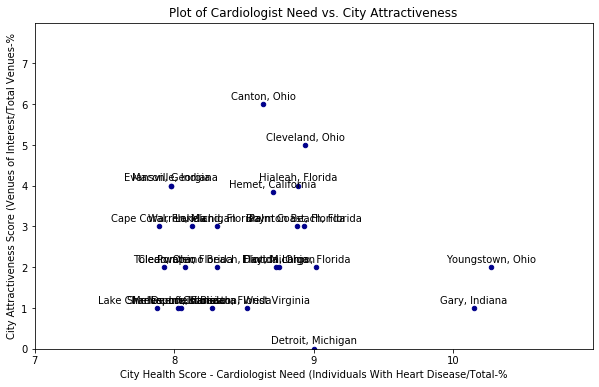

In [62]:
#Create Scatter Chart
KeyItems_sorted.plot(kind='scatter', x='Health Score', y='City Score', figsize=(10, 6), color='darkblue')

plt.title('Plot of Cardiologist Need vs. City Attractiveness')
plt.xlabel('City Health Score - Cardiologist Need (Individuals With Heart Disease/Total-%')
plt.ylabel('City Attractiveness Score (Venues of Interest/Total Venues-%')

for label,x,y in zip(FinalDF['City'], FinalDF['Health Score'], FinalDF['City Score']):

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')
plt.xlim([7.0, 11.0])
plt.ylim([0.0, 8.0])   
plt.yticks(np.arange(0.0, 8.0, 1.0))
plt.xticks(np.arange(7.0, 11.0, 1.0))
    
plt.show()

**Summary and Conclusions** 
The cardiologist will have to decide whether he/she is driven more by professional or personal interests.
If driven by professional interests, Youngstown, Ohio and Gary, Indiana have the greatest needs for a cardiologist.
If driven by personal interests, Canton, Ohio has the most to offer based on my metric.  However, Cleveland, Ohio might be a good solution as well. Given that we have already filtered down the database to cities with greatest need, I would recommend either Canton, Ohio, Cleveland, Ohio, or Youngstown, Ohio as the cities which offer the best opportunities for personal and professional success.